<a href="https://colab.research.google.com/github/gaurav21s/Prediction-Using-Supervised-ML/blob/main/Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction using Supervised ML
### Name : Gaurav Shrivastav
 In this task we will predict the score on the basis of study hours.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Text(0.5, 1.0, 'Hours vs Scores Graph')

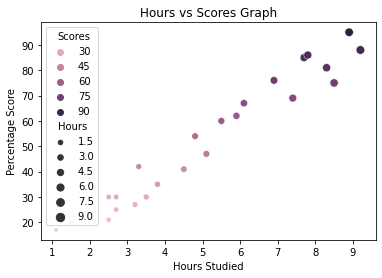

In [4]:
pl = sns.scatterplot(data=df,x='Hours',y='Scores',hue='Scores',size='Hours')
sns.set(rc={'figure.figsize':(8,8)})
pl.set_xlabel('Hours Studied')
pl.set_ylabel('Percentage Score')
pl.set_title('Hours vs Scores Graph')

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

##Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [7]:
lreg = LinearRegression()
lreg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


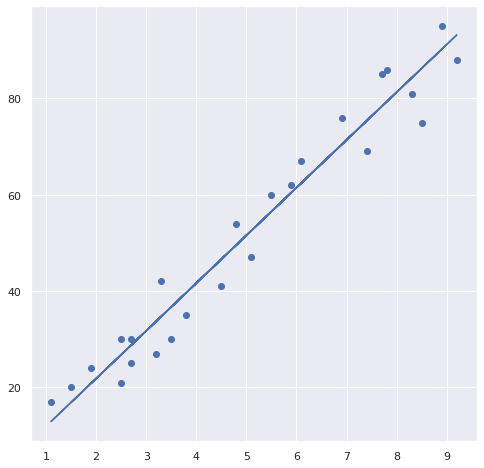

In [16]:
line = lreg.coef_*X+lreg.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.



In [9]:
y_pred = lreg.predict(X_test)

In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
print("Accuracy is :", lreg.score(X_test, y_test))

Accuracy is : 0.9454906892105354


In [12]:
hours = float(input('No of Hours you will study is:'))
own_pred = lreg.predict([[hours]])

print("Predicted Score = {}".format(own_pred[0]))

No of Hours you will study is:7.8945
Predicted Score = 80.25783762786483


In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
